In [85]:
# 다음 분기에 어떤 게임을 설계해야 할까?(목표 : 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것)
# 발표를 듣는 사람은 비데이터 직군이라 가정

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload();

Saving vgames2.csv to vgames2 (1).csv


In [352]:
df_0 = pd.read_csv('vgames2.csv')
df_0.shape, df_0.info(), df_0.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


((16598, 10), None,          Unnamed: 0          Year
 count  16598.000000  16327.000000
 mean    8299.500000   1994.242543
 std     4791.574219    155.077168
 min        1.000000      0.000000
 25%     4150.250000   2003.000000
 50%     8299.500000   2007.000000
 75%    12448.750000   2010.000000
 max    16598.000000   2020.000000)

In [353]:
df_0.head()
df = df_0.copy()
df.isnull().sum(), df['Year'].describe()

(Unnamed: 0       0
 Name             0
 Platform         0
 Year           271
 Genre           50
 Publisher       58
 NA_Sales         0
 EU_Sales         0
 JP_Sales         0
 Other_Sales      0
 dtype: int64, count    16327.000000
 mean      1994.242543
 std        155.077168
 min          0.000000
 25%       2003.000000
 50%       2007.000000
 75%       2010.000000
 max       2020.000000
 Name: Year, dtype: float64)

In [354]:
missing_year = df[df['Year'].isnull()]
missing_year
du_year = missing_year[missing_year['Name'].duplicated()]
du_year.shape

(38, 10)

In [355]:
# Year의 결측치 ; Name을 기준으로 채우기
df_year = df[['Name', 'Year']]
df_year = df_year.dropna(axis=0)
df_year = df_year.drop_duplicates(['Name'], keep='first')
df = df.drop(['Year'], axis=1)
df1 = pd.merge(df, df_year, how='outer', on='Name')
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
 9   Year         16451 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


,Unnamed: 0,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year
0,1,Candace Kane's Candy Factory,DS,Action,Destineer,0.04,0,0,0,2008.0
1,15097,Candace Kane's Candy Factory,Wii,Action,Destineer,0.14,0,0,0.01,2008.0
2,2,The Munchables,Wii,Action,Namco Bandai Games,0.17,0,0,0.01,2009.0
3,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Adventure,Alchemist,0,0,0.02,0,2010.0
4,4,Deal or No Deal: Special Edition,DS,Misc,Zoo Games,0.04,0,0,0,2010.0


In [356]:
# Genre의 결측치 ; Name을 기준으로 채우기
df_genre = df[['Name', 'Genre']]
df_genre = df_genre.dropna(axis=0)

df_genre = df_genre.drop_duplicates(['Name'], keep='first')
df = df.drop(['Genre'], axis=1)
df2 = pd.merge(df, df_genre, how='outer', on='Name')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   16598 non-null  int64 
 1   Name         16598 non-null  object
 2   Platform     16598 non-null  object
 3   Publisher    16540 non-null  object
 4   NA_Sales     16598 non-null  object
 5   EU_Sales     16598 non-null  object
 6   JP_Sales     16598 non-null  object
 7   Other_Sales  16598 non-null  object
 8   Genre        16568 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


,Unnamed: 0,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre
0,1,Candace Kane's Candy Factory,DS,Destineer,0.04,0,0,0,Action
1,15097,Candace Kane's Candy Factory,Wii,Destineer,0.14,0,0,0.01,Action
2,2,The Munchables,Wii,Namco Bandai Games,0.17,0,0,0.01,Action
3,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,Alchemist,0,0,0.02,0,Adventure
4,4,Deal or No Deal: Special Edition,DS,Zoo Games,0.04,0,0,0,Misc


In [357]:
# Publisher의 결측치 ; Name을 기준으로 채우기
df_publisher = df[['Name', 'Publisher']]
df_publisher = df_publisher.dropna(axis=0)

df_publisher = df_publisher.drop_duplicates(['Name'], keep='first')
df = df.drop(['Publisher'], axis=1)
df3 = pd.merge(df, df_publisher, how='outer', on='Name')
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   16598 non-null  int64 
 1   Name         16598 non-null  object
 2   Platform     16598 non-null  object
 3   NA_Sales     16598 non-null  object
 4   EU_Sales     16598 non-null  object
 5   JP_Sales     16598 non-null  object
 6   Other_Sales  16598 non-null  object
 7   Publisher    16547 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


,Unnamed: 0,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Publisher
0,1,Candace Kane's Candy Factory,DS,0.04,0,0,0,Destineer
1,15097,Candace Kane's Candy Factory,Wii,0.14,0,0,0.01,Destineer
2,2,The Munchables,Wii,0.17,0,0,0.01,Namco Bandai Games
3,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,0,0,0.02,0,Alchemist
4,4,Deal or No Deal: Special Edition,DS,0.04,0,0,0,Zoo Games


In [358]:
Year = df1[['Unnamed: 0' , 'Year']]
Genre = df2[['Unnamed: 0' , 'Genre']]
Publisher = df3[['Unnamed: 0' , 'Publisher']]

df_merge1 = pd.merge(df,Year, how='outer', on='Unnamed: 0')
df_merge2 = pd.merge(df_merge1,Genre, how='outer', on='Unnamed: 0')
df_a = pd.merge(df_merge2,Publisher, how='outer', on='Unnamed: 0')
df_a.info()
df_a.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   NA_Sales     16598 non-null  object 
 4   EU_Sales     16598 non-null  object 
 5   JP_Sales     16598 non-null  object 
 6   Other_Sales  16598 non-null  object 
 7   Year         16451 non-null  float64
 8   Genre        16568 non-null  object 
 9   Publisher    16547 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


,Unnamed: 0,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Genre,Publisher
0,1,Candace Kane's Candy Factory,DS,0.04,0,0,0,2008.0,Action,Destineer
1,2,The Munchables,Wii,0.17,0,0,0.01,2009.0,Action,Namco Bandai Games
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,0,0,0.02,0,2010.0,Adventure,Alchemist
3,4,Deal or No Deal: Special Edition,DS,0.04,0,0,0,2010.0,Misc,Zoo Games
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,0.12,0.09,0,0.04,2010.0,Platform,D3Publisher


In [359]:
# 출고량의 기본단위는 Million으로 판단, Sales에 M이 있는 경우에는 삭제, K가 있는 경우에는 0.001을 곱하여 million으로 변경
df_a['NA1'] = df_a.NA_Sales.str.replace(r'[K,M]', '', regex=True).astype('float')
df_a['NA2'] = df_a['NA_Sales']
df_a['NA2'] = df_a.NA2.str.replace(r'[\d+.]', '', regex=True)
df_a['NA2'] = df_a.NA2.str.replace(r'[K]', '0.001', regex=True)
df_a['NA2'] = df_a.NA2.str.replace(r'[M]', '1', regex=True)
df_a['NA2'] = pd.to_numeric(df_a['NA2'], errors='coerce')
df_a['NA2'] = df_a['NA2'].fillna(1)
df_a['NA_Sales'] = df_a['NA1']*df_a['NA2']

In [360]:
df_a['EU1'] = df_a.EU_Sales.str.replace(r'[K,M]', '', regex=True).astype('float')
df_a['EU2'] = df_a['EU_Sales']
df_a['EU2'] = df_a.EU2.str.replace(r'[\d+.]', '', regex=True)
df_a['EU2'] = df_a.EU2.str.replace(r'[K]', '0.001', regex=True)
df_a['EU2'] = df_a.EU2.str.replace(r'[M]', '1', regex=True)
df_a['EU2'] = pd.to_numeric(df_a['EU2'], errors='coerce')
df_a['EU2'] = df_a['EU2'].fillna(1)
df_a['EU_Sales'] = df_a['EU1']*df_a['EU2']

In [361]:
df_a['JP1'] = df_a.JP_Sales.str.replace(r'[K,M]', '', regex=True).astype('float')
df_a['JP2'] = df_a['JP_Sales']
df_a['JP2'] = df_a.JP2.str.replace(r'[\d+.]', '', regex=True)
df_a['JP2'] = df_a.JP2.str.replace(r'[K]', '0.001', regex=True)
df_a['JP2'] = df_a.JP2.str.replace(r'[M]', '1', regex=True)
df_a['JP2'] = pd.to_numeric(df_a['JP2'], errors='coerce')
df_a['JP2'] = df_a['JP2'].fillna(1)
df_a['JP_Sales'] = df_a['JP1']*df_a['JP2']

In [362]:
df_a['Other1'] = df_a.Other_Sales.str.replace(r'[K,M]', '', regex=True).astype('float')
df_a['Other2'] = df_a['Other_Sales']
df_a['Other2'] = df_a.Other2.str.replace(r'[\d+.]', '', regex=True)
df_a['Other2'] = df_a.Other2.str.replace(r'[K]', '0.001', regex=True)
df_a['Other2'] = df_a.Other2.str.replace(r'[M]', '1', regex=True)
df_a['Other2'] = pd.to_numeric(df_a['Other2'], errors='coerce')
df_a['Other2'] = df_a['Other2'].fillna(1)
df_a['Other_Sales'] = df_a['Other1']*df_a['Other2']

df_a.sample(10)

,Unnamed: 0,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Genre,Publisher,NA1,NA2,EU1,EU2,JP1,JP2,Other1,Other2
15716,15717,Battlestations: Midway,PC,0.00,0.01,0.00,0.00,2007.0,Strategy,Eidos Interactive,0.00,1.0,0.01,1.0,0.00,1.0,0.00,1.0
16597,16598,The King of Fighters '95,PS,0.00,0.00,0.16,0.01,1995.0,Fighting,SNK,0.00,1.0,0.00,1.0,0.16,1.0,0.01,1.0
12118,12119,LEGO Marvel's Avengers,WiiU,0.12,0.09,0.00,0.02,2016.0,Action,Warner Bros. Interactive Entertainment,0.12,1.0,0.09,1.0,0.00,1.0,0.02,1.0
4792,4793,Pandemonium 2,PS,0.04,0.02,0.00,0.00,1997.0,Platform,BMG Interactive Entertainment,0.04,1.0,0.02,1.0,0.00,1.0,0.00,1.0
2242,2243,Ultimate Party Challenge,Wii,0.07,0.00,0.00,0.01,2009.0,Misc,Konami Digital Entertainment,0.07,1.0,0.00,1.0,0.00,1.0,0.01,1.0
5816,5817,Sony Computer Science Kenkyuujo Mogi Kenichiro...,PSP,0.00,0.00,0.07,0.00,2006.0,Misc,Sega,0.00,1.0,0.00,1.0,0.07,1.0,0.00,1.0
1326,1327,Monster Jam,Wii,0.15,0.00,0.00,0.01,2007.0,Racing,Activision,0.15,1.0,0.00,1.0,0.00,1.0,0.01,1.0
5775,5776,Fight Night Champion,X360,0.40,0.33,0.00,0.07,2011.0,Fighting,Electronic Arts,0.40,1.0,0.33,1.0,0.00,1.0,0.07,1.0
10257,10258,Greg Hastings' Tournament Paintball Max'd,GBA,0.02,0.01,0.00,0.00,2006.0,Shooter,Activision,0.02,1.0,0.01,1.0,0.00,1.0,0.00,1.0
6355,6356,Blast Chamber,PS,0.05,0.04,0.00,0.01,1996.0,Shooter,Activision,0.05,1.0,0.04,1.0,0.00,1.0,0.01,1.0


In [363]:
df_a = df_a.drop(columns = ['NA1', 'NA2', 'EU1', 'EU2','JP1', 'JP2', 'Other1', 'Other2'])
df_a['Total_Sales'] = df_a['NA_Sales'] + df_a["EU_Sales"] + df_a['JP_Sales'] + df_a['Other_Sales']
df_a.describe()

,Unnamed: 0,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Total_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16451.000000,16598.000000
mean,8299.500000,0.264667,0.146652,0.077782,0.048063,1993.112090,0.537164
std,4791.574219,0.816683,0.505351,0.309291,0.188588,162.239212,1.555151
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4150.250000,0.000000,0.000000,0.000000,0.000000,2003.000000,0.060000
50%,8299.500000,0.080000,0.020000,0.000000,0.010000,2007.000000,0.170000
75%,12448.750000,0.240000,0.110000,0.040000,0.040000,2010.000000,0.470000
max,16598.000000,41.490000,29.020000,10.220000,10.570000,2020.000000,82.740000


In [364]:
# Year : 객관적인 수집이 가능한 영역이므로 중요자료는 보완
# 1900년 이전 자료와 결측치 : Total_Sales를 기준으로 평균 이하의 경우에는 결측치를 제거하고, 평균 이상의 경우에는 개별적으로 수집한 자료로 대체

df_a.groupby('Year').count()
error_year = df_a[(df_a['Year'] < 1900) | (df_a['Year'] >= 2017)]
error_year[error_year['Total_Sales'] > 0.537]

df_a.loc[df_a['Name'] == 'NASCAR Thunder 2004', 'Year'] = 2003
df_a.loc[df_a['Name'] == "Mini-Yonku Shining Scorpion: Let's & Go!!", 'Year'] = 1997
df_a.loc[df_a['Name'] == "Ratchet & Clank: Going Commando	", 'Year'] = 2003
df_a.loc[df_a['Name'] == "SpongeBob SquarePants featuring Nicktoons: Globs of Doom", 'Year'] = 2008
df_a.loc[df_a['Name'] == "SplashDown", 'Year'] = 2001
df_a.loc[df_a['Name'] == "Ratchet & Clank: Going Commando", 'Year'] = 2003
df_a.loc[df_a['Name'] == "SOCOM: U.S. Navy SEALs Fireteam Bravo 2", 'Year'] = 2006
df_a.loc[df_a['Name'] == "The SpongeBob SquarePants Movie", 'Year'] = 2005
df_a.loc[df_a['Name'] == "Uncharted 4: A Thief's End	", 'Year'] = 2016
df_a.loc[df_a['Name'] == "Adventure Island", 'Year'] = 1986
df_a.loc[df_a['Name'] == "Uncharted 4: A Thief's End", 'Year'] = 2016
df_a.loc[df_a['Name'] == "NBA 2K15", 'Year'] = 2014
df_a.loc[df_a['Name'] == "Virtua Cop", 'Year'] = 1994
df_a.loc[df_a['Name'] == "Kingdom Hearts: Birth by Sleep", 'Year'] = 2010
df_a.loc[df_a['Name'] == "NCAA Football 2002", 'Year'] = 2001
df_a.loc[df_a['Name'] == "Wolfenstein", 'Year'] = 2009
df_a.loc[df_a['Name'] == "Pokemon Black/Pokemon White", 'Year'] = 2010
df_a.loc[df_a['Name'] == "Disney's Aladdin", 'Year'] = 1993

error_year = df_a[(df_a['Year'] < 1900) | (df_a['Year'] >= 2017)]
error_year[error_year['Total_Sales'] > 0.537]



,Unnamed: 0,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Genre,Publisher,Total_Sales


In [365]:
# Year : 객관적인 수집이 가능한 영역이므로 중요자료는 보완
# 1900년 이전 자료와 결측치 : Total_Sales를 기준으로 평균 이하의 경우에는 결측치를 제거하고, 평균 이상의 경우에는 개별적으로 수집한 자료로 대체
missing_year = df_a[df_a['Year'].isnull()]
df_a['Year'].isnull().sum()
missing_year[missing_year['Total_Sales'] > 0.537]

df_a.loc[df_a['Name'] == 'Rock Band', 'Year'] = 2007
df_a.loc[df_a['Name'] == "Donkey Kong Land III", 'Year'] = 1997
df_a.loc[df_a['Name'] == "wwe Smackdown vs. Raw 2006", 'Year'] = 2009
df_a.loc[df_a['Name'] == "Legacy of Kain: Soul Reaver", 'Year'] = 1999
df_a.loc[df_a['Name'] == "Test Drive Unlimited 2", 'Year'] = 2011
df_a.loc[df_a['Name'] == "Yakuza 4", 'Year'] = 2010
df_a.loc[df_a['Name'] == "Adventure", 'Year'] = 1980
df_a.loc[df_a['Name'] == "Advance Wars: Days of Ruin", 'Year'] = 2008
df_a.loc[df_a['Name'] == "Triple Play 99", 'Year'] = 1998
df_a.loc[df_a['Name'] == "Air-Sea Battle", 'Year'] = 1977
df_a.loc[df_a['Name'] == "WarioWare: Twisted!", 'Year'] = 2004
df_a.loc[df_a['Name'] == "Frogger's Adventures: Temple of the Frog", 'Year'] = 2001
df_a.loc[df_a['Name'] == "Monster Hunter 2", 'Year'] = 2006
df_a.loc[df_a['Name'] == "Suikoden III", 'Year'] = 2002
df_a.loc[df_a['Name'] == "Combat", 'Year'] = 1995
 

missing_year = df_a[df_a['Year'].isnull()]
missing_year[missing_year['Total_Sales'] > 0.537]

,Unnamed: 0,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Genre,Publisher,Total_Sales


In [366]:
# Genre 결측치 처리 : Total_Sales를 기준으로 평균 이하의 경우에는 결측치를 제거하고, 평균 이상의 경우에는 개별적으로 수집한 자료로 대체
missing_genre = df_a[df_a['Genre'].isnull()]
df_a['Genre'].isnull().sum()
missing_genre[missing_genre['Total_Sales'] > 0.537]

df_a.loc[df_a['Name'] == "Ape Escape: On the Loose", 'Genre'] = 'Platform'
df_a.loc[df_a['Name'] == "SingStar Singalong With Disney", 'Genre'] = 'Action'
df_a.loc[df_a['Name'] == "Pokemon X/Pokemon Y", 'Genre'] = 'Role-Playing'
df_a.loc[df_a['Name'] == "Wii Party", 'Genre'] = 'Misc'
df_a.loc[df_a['Name'] == "Chrono Cross", 'Genre'] = 'Role-Playing'
df_a.loc[df_a['Name'] == "Final Fantasy XII", 'Genre'] = 'Role-Playing'
df_a.loc[df_a['Name'] == "Yakuza 3", 'Genre'] = 'Action'
df_a.loc[df_a['Name'] == "F-Zero X", 'Genre'] = 'Racing'
df_a.loc[df_a['Name'] == "Onimusha: Warlords", 'Genre'] = 'Action'
df_a.loc[df_a['Name'] == "WarioWare, Inc.: Mega Party Game$", 'Genre'] = 'Misc'
df_a.loc[df_a['Name'] == "Bloodborne", 'Genre'] = 'Action'

missing_genre = df_a[df_a['Genre'].isnull()]
missing_genre[missing_genre['Total_Sales'] > 0.537]

,Unnamed: 0,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Genre,Publisher,Total_Sales


In [367]:
# # Publisher 결측치 처리 : 결측치 개수가 51개로 전체의 0.3%수준, 그러므로 결측치 제거하여 분석
missing_publisher = df_a[df_a['Publisher'].isnull()]
df_a['Publisher'].isnull().sum()
missing_publisher[missing_publisher['Total_Sales'] > 0.537]

df_a.loc[df_a['Name'] == "Nicktoons Collection: Game Boy Advance Video Volume 1", 'Publisher'] = 'Nintendo'
df_a.loc[df_a['Name'] == "wwe Smackdown vs. Raw 2006", 'Publisher'] = "Yuke's"
df_a.loc[df_a['Name'] == "Bentley's Hackpack", 'Publisher'] = 'Sony Computer Entertainment'
df_a.loc[df_a['Name'] == "Triple Play 99", 'Publisher'] = 'EA Sports'
df_a.loc[df_a['Name'] == "SpongeBob SquarePants: Game Boy Advance Video Volume 1", 'Publisher'] = 'Majesco Entertainment'
df_a.loc[df_a['Name'] == "Shrek / Shrek 2 2-in-1 Gameboy Advance Video", 'Publisher'] = 'Majesco Entertainment'

missing_publisher = df_a[df_a['Publisher'].isnull()]
missing_publisher[missing_publisher['Total_Sales'] > 0.537]

# # Platform 결측치 없음
missing_platform = df_a[df_a['Platform'].isnull()]
df_a['Platform'].isnull().sum()
df_a.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   NA_Sales     16598 non-null  float64
 4   EU_Sales     16598 non-null  float64
 5   JP_Sales     16598 non-null  float64
 6   Other_Sales  16598 non-null  float64
 7   Year         16471 non-null  float64
 8   Genre        16579 non-null  object 
 9   Publisher    16553 non-null  object 
 10  Total_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [368]:
# 결측치 제거 후 인덱스 재설정
# 데이터 전처리 후 데이터 csv 파일로 저장
df_a.isnull().sum()
index1 = df_a[(df_a['Year'] < 1900) | (df_a['Year'] >= 2017)].index
df_a = df_a.drop(index1)
df_a = df_a.dropna(axis='index', how='any', subset=['Year'])
df_a = df_a.dropna(axis='index', how='any', subset=['Genre'])
df_a = df_a.dropna(axis='index', how='any', subset=['Publisher'])
df_a['Year'] = df_a['Year'].astype('int')
df_a.drop_duplicates()
df_a.info()
data = df_a.reset_index(drop=True)
data.to_csv('data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16336 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16336 non-null  int64  
 1   Name         16336 non-null  object 
 2   Platform     16336 non-null  object 
 3   NA_Sales     16336 non-null  float64
 4   EU_Sales     16336 non-null  float64
 5   JP_Sales     16336 non-null  float64
 6   Other_Sales  16336 non-null  float64
 7   Year         16336 non-null  int64  
 8   Genre        16336 non-null  object 
 9   Publisher    16336 non-null  object 
 10  Total_Sales  16336 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [369]:
data_name = data.groupby('Name')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'].sum()
data_object = data[['Name', 'Year', 'Genre', 'Publisher']]
data_object = data_object.drop_duplicates()
data_name= pd.merge(data_name, data_object, how='outer', on='Name')
data_name

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year,Genre,Publisher
0,'98 Koshien,0.15,0.10,0.12,0.03,0.40,1998,Sports,Magical Company
1,.hack//G.U. Vol.1//Rebirth,0.00,0.00,0.17,0.00,0.17,2006,Role-Playing,Namco Bandai Games
2,.hack//G.U. Vol.2//Reminisce,0.11,0.09,0.00,0.03,0.23,2006,Role-Playing,Namco Bandai Games
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.00,0.00,0.16,0.00,0.16,2006,Role-Playing,Namco Bandai Games
4,.hack//G.U. Vol.3//Redemption,0.00,0.00,0.17,0.00,0.17,2007,Role-Playing,Namco Bandai Games
...,...,...,...,...,...,...,...,...,...
11256,thinkSMART: Chess for Kids,0.01,0.00,0.00,0.00,0.01,2011,Misc,Mentor Interactive
11257,uDraw Studio,1.67,0.58,0.00,0.20,2.45,2010,Misc,THQ
11258,uDraw Studio: Instant Artist,0.09,0.10,0.00,0.02,0.21,2011,Misc,THQ
11259,wwe Smackdown vs. Raw 2006,1.57,1.02,0.00,0.41,3.00,2009,Fighting,Yuke's


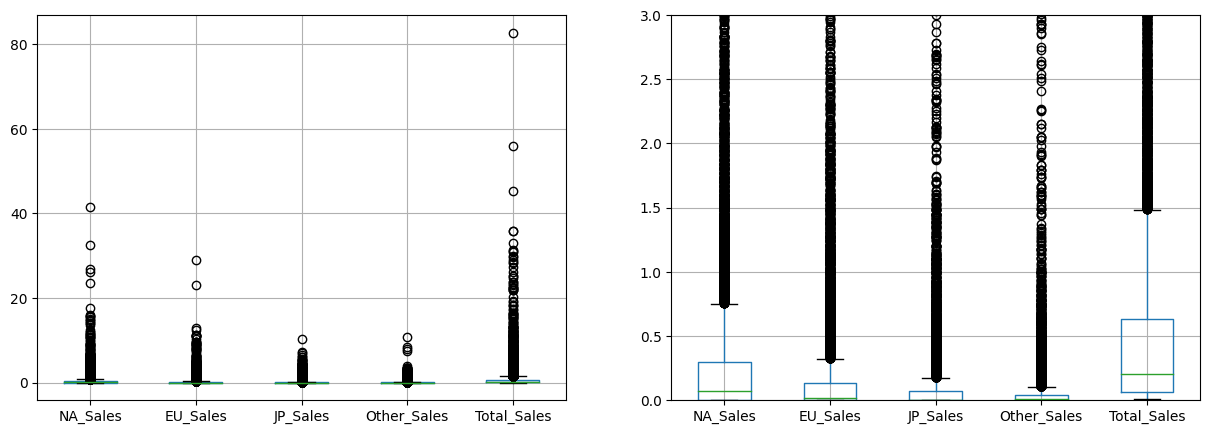

(1369, 9892)

In [370]:
# Total_Sales기준으로 1.5 이상에서 많은 데이터가 존재함
# box_plot 확인 결과, 개별 지역의 Sales에서도 이상치 부분이 많은 부분을 차지하므로 지워주지 않음.

plt.figure(figsize = (15,5))
plt.subplot(121)
data_name.boxplot(column = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales'])
plt.subplot(122)
data_name.boxplot(column = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales'])
plt.ylim(0, 3);
plt.show()

len(data_name[data_name['Total_Sales'] > 1.5]), len(data_name[data_name['Total_Sales'] <= 1.5])

In [371]:
data_name_2011 = data_name.query( "Year >= 2011")
data_name_2011.to_csv('data_name_2011.csv', index=False)
data_name.to_csv('data_name.csv', index=False)

In [372]:
data_name.describe()
data_name.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


NA_Sales        1.401575
EU_Sales        0.592311
JP_Sales        0.152156
Other_Sales     0.076599
Total_Sales     5.117637
Year           36.903840
dtype: float64

In [373]:
data_name.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year
NA_Sales,1.000000,0.783911,0.405633,0.712754,0.947161,-0.040964
EU_Sales,0.783911,1.000000,0.366166,0.821516,0.914091,0.043908
JP_Sales,0.405633,0.366166,1.000000,0.254511,0.540417,-0.143522
Other_Sales,0.712754,0.821516,0.254511,1.000000,0.818715,0.074202
Total_Sales,0.947161,0.914091,0.540417,0.818715,1.000000,-0.022169
Year,-0.040964,0.043908,-0.143522,0.074202,-0.022169,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,NA,EU,JP,Other
Year,,,,
1977,92.9,6.1,0.0,1.0
1980,88.2,10.2,0.0,1.6
1981,92.8,6.2,0.0,1.0
1982,90.5,6.0,2.4,1.1
1983,52.6,7.4,37.8,2.3
1984,67.7,5.1,25.9,1.4
1985,63.8,10.1,24.2,1.9
1986,35.2,8.1,51.1,5.7
1987,40.2,7.1,51.6,1.0


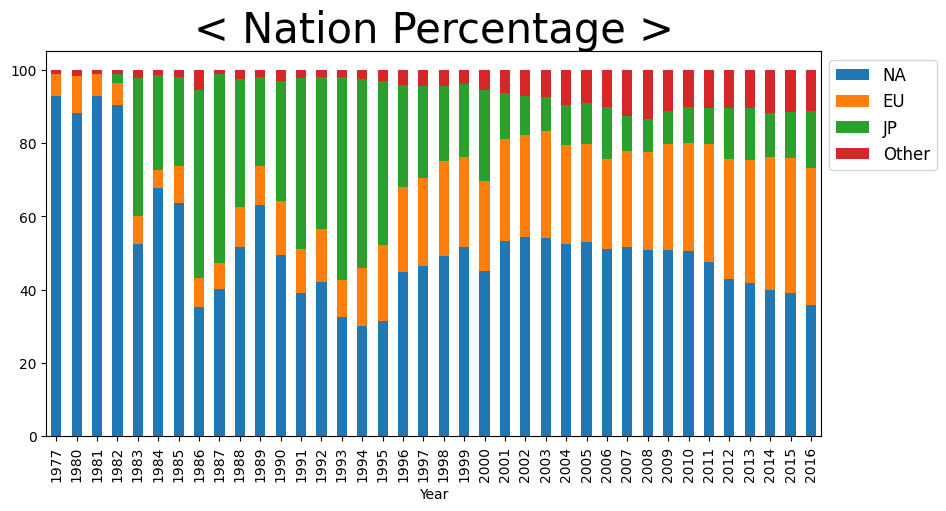

In [374]:
# 콘솔 게임 시장 분석
data_year = data_name.groupby('Year')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'].sum()
data_year['NA'] = round((data_year['NA_Sales']/data_year['Total_Sales'])*100, 1)
data_year['EU'] = round((data_year['EU_Sales']/data_year['Total_Sales'])*100, 1)
data_year['JP'] = round((data_year['JP_Sales']/data_year['Total_Sales'])*100, 1)
data_year['Other'] = round((data_year['Other_Sales']/data_year['Total_Sales'])*100, 1)
data_year_P = data_year.drop(columns=['NA_Sales',	'EU_Sales'	,'JP_Sales',	'Other_Sales',	'Total_Sales'	])

data_year_P.plot.bar(stacked=True, figsize=(10,5))
plt.title('< Nation Percentage >', fontsize = 30)
plt.legend(loc=2, bbox_to_anchor=(1,1), fontsize = 12)
data_year_P

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


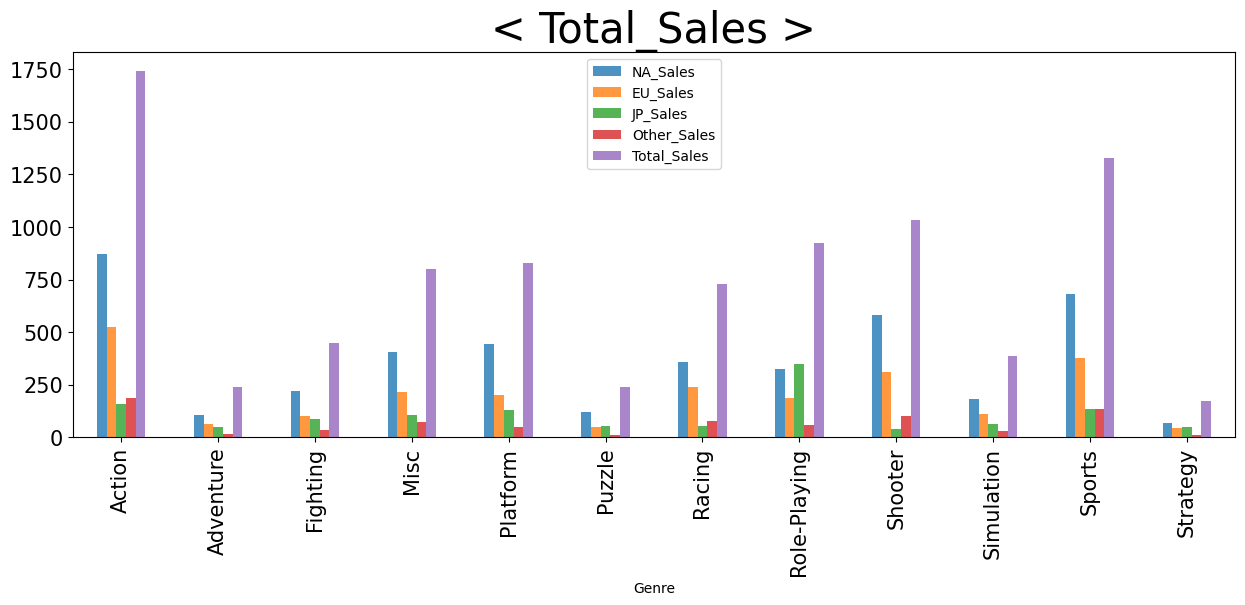

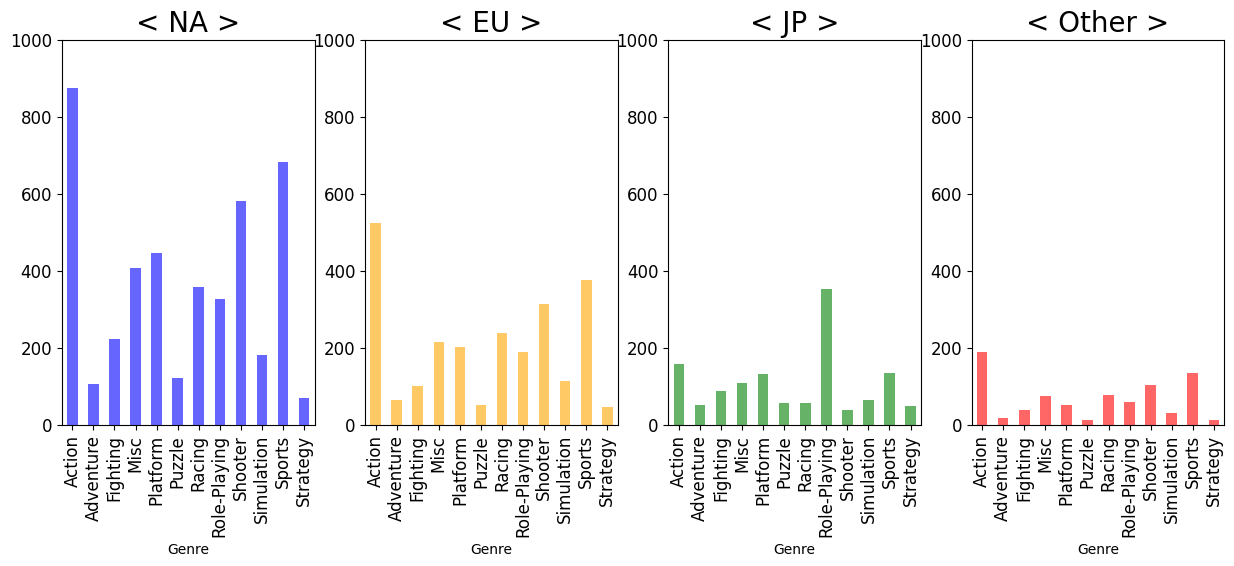

In [375]:
# 각 지역의 선호하는 게임을 탐색, 선호도 = 출고량
# 미국, EU, Other ; Action선호, 일본 : Role-playing
data_g = data_name.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'].sum()
data_g.plot(kind='bar', fontsize=15, alpha=0.8, figsize =(15,5))
plt.title('< Total_Sales >', fontsize = 30)
plt.show()

plt.figure(figsize = (15,5))

plt.subplot(141)
plt.title('< NA >', fontsize = 20)
plt.ylim([0, 1000])
data_g['NA_Sales'].plot(kind='bar', color = 'blue', fontsize=12, alpha=0.6)

plt.subplot(142)
plt.title('< EU >',fontsize = 20)
plt.ylim([0, 1000])
data_g["EU_Sales"].plot(kind='bar', color = 'orange' , fontsize=12, alpha=0.6)

plt.subplot(143)
plt.title('< JP >',fontsize = 20)
plt.ylim([0, 1000])
data_g['JP_Sales'].plot(kind='bar', color ='green', fontsize=12, alpha=0.6)

plt.subplot(144)
plt.title('< Other >', fontsize = 20)
plt.ylim([0, 1000])
data_g['Other_Sales'].plot(kind='bar', color = 'red', fontsize=12, alpha=0.6)
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


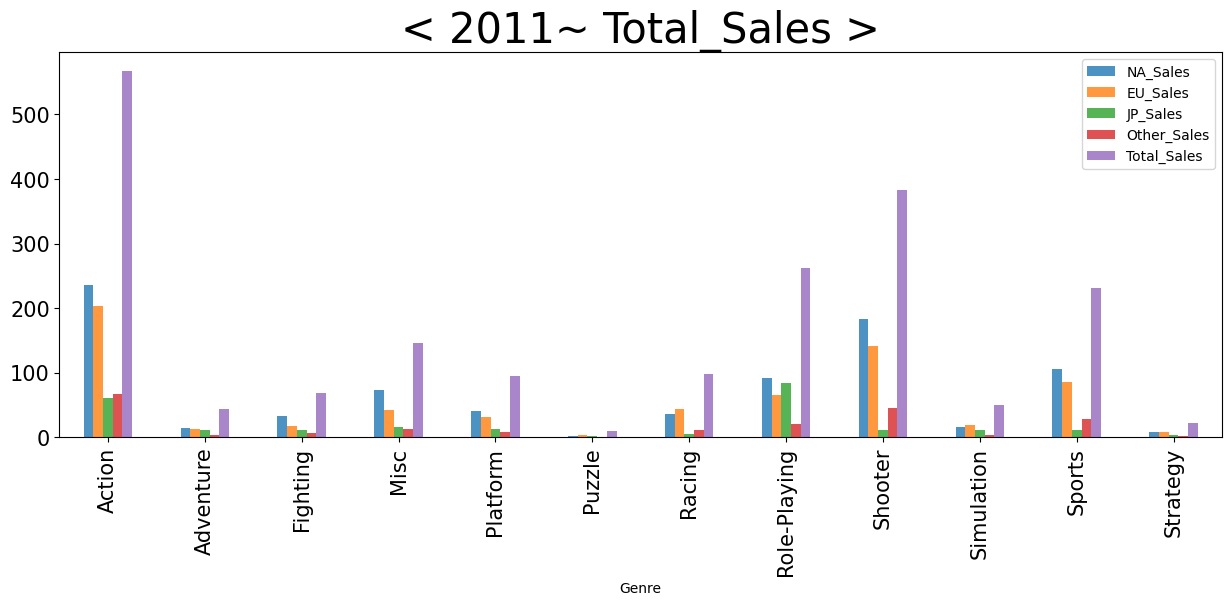

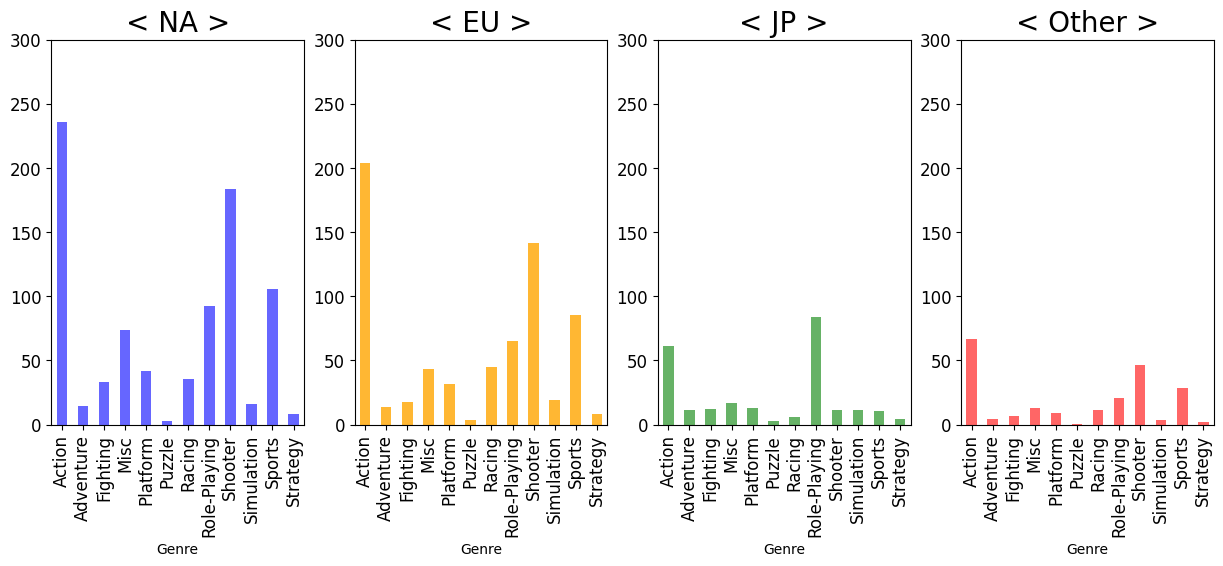

In [376]:
# 2011년 이후 최신 데이터만 분석
# 미국, EU, Other ; Action.Sports => 최근 Action, shooter 선호, 일본 : Role-playing, Action선호(Role은 지배력 약화)

data_g2011 = data_name_2011.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'].sum()
data_g2011.plot(kind='bar', fontsize=15, alpha=0.8, figsize =(15,5))
plt.title('< 2011~ Total_Sales >', fontsize = 30)
plt.show()

plt.figure(figsize = (15,5))
plt.subplot(141)
plt.title('< NA >',fontsize = 20)
plt.ylim([0, 300])
data_g2011['NA_Sales'].plot(kind='bar', color = 'blue', fontsize=12, alpha=0.6)

plt.subplot(142)
plt.title('< EU >',fontsize = 20)
plt.ylim([0, 300])
data_g2011["EU_Sales"].plot(kind='bar', color = 'orange' , fontsize=12, alpha=0.8)

plt.subplot(143)
plt.title('< JP >',fontsize = 20)
plt.ylim([0, 300])
data_g2011['JP_Sales'].plot(kind='bar', color ='green', fontsize=12, alpha=0.6)

plt.subplot(144)
plt.title('< Other >',fontsize = 20)
plt.ylim([0, 300])
data_g2011['Other_Sales'].plot(kind='bar', color = 'red', fontsize=12, alpha=0.6)
plt.show()


In [377]:
# 랭크
data_g
data_g[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']] = data_g[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].rank(method='min', ascending = False)
data_g[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']] = data_g[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']].astype('int')
data_grank = data_g[['Total_rank', 'NA_rank', 'EU_rank', 'JP_rank', 'Other_rank']]
data_grank


,Total_rank,NA_rank,EU_rank,JP_rank,Other_rank
Genre,,,,,
Action,1,1,1,2,1
Adventure,11,11,10,10,10
Fighting,8,8,9,6,8
Misc,6,5,5,5,5
Platform,5,4,6,4,7
Puzzle,10,10,11,8,11
Racing,7,6,4,9,4
Role-Playing,4,7,7,1,6
Shooter,3,3,3,12,3


In [378]:
# 랭크

data_g2011[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']] = data_g2011[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].rank(method='min', ascending = False)
data_g2011[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']] = data_g2011[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']].astype('int')
data_grank2011 = data_g2011[['Total_rank','NA_rank', 'EU_rank', 'JP_rank', 'Other_rank']]
data_grank2011

,Total_rank,NA_rank,EU_rank,JP_rank,Other_rank
Genre,,,,,
Action,1,1,1,2,1
Adventure,10,10,10,6,9
Fighting,8,8,9,5,8
Misc,5,5,6,3,5
Platform,7,6,7,4,7
Puzzle,12,12,12,12,12
Racing,6,7,5,10,6
Role-Playing,3,4,4,1,4
Shooter,2,2,2,8,2


In [379]:
#연도별 게임 트렌드
data_y = data_name.groupby(['Year','Genre'], as_index=False)['Total_Sales'].sum()
data_y2 = data_name.groupby(['Year'], as_index=False)['Total_Sales'].sum()

data_y2[['Year', 'Year_Total']] = data_y2[['Year','Total_Sales']]
data_y2 = data_y2.drop(columns = ['Total_Sales'])
data_y3 = pd.merge(data_y, data_y2, how='outer', on='Year')
data_y3['percent'] = round((data_y3['Total_Sales']/data_y3['Year_Total'])*100, 2)
data_y3 = data_y3.drop(columns=['Total_Sales',	'Year_Total'])
data_y4 = data_y3[data_y3['Year']> 2000]
data_y5 = data_y3[data_y3['Year']> 2010]


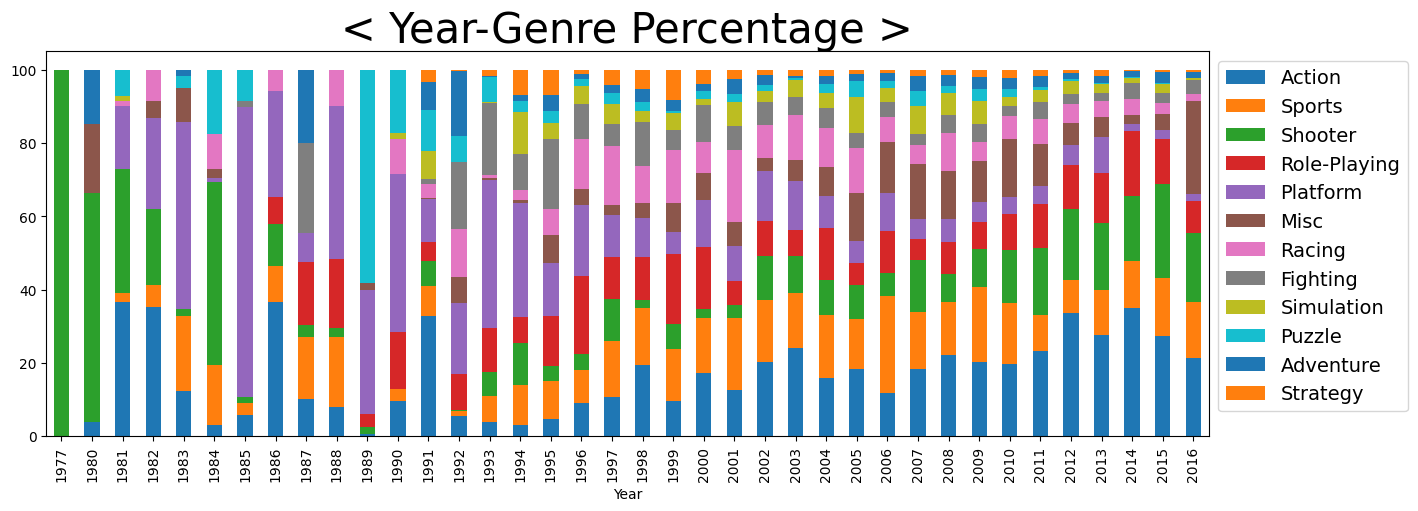

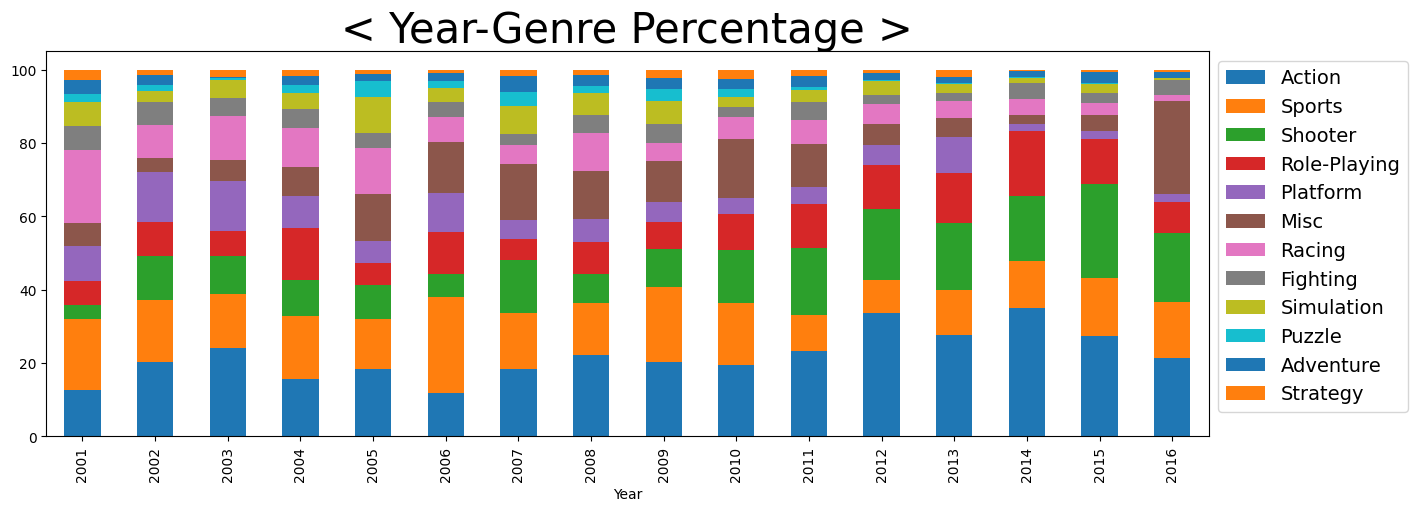

Genre,Action,Sports,Shooter,Role-Playing,Platform,Misc,Racing,Fighting,Simulation,Puzzle,Adventure,Strategy
Year,,,,,,,,,,,,
2001,12.54,19.62,3.66,6.58,9.52,6.39,19.70,6.58,6.53,2.17,4.07,2.64
2002,20.23,16.88,12.06,9.44,13.65,3.67,8.95,6.38,2.85,1.69,2.82,1.38
2003,24.05,14.94,10.15,7.03,13.48,5.81,12.08,4.86,4.85,0.40,0.49,1.86
2004,15.77,17.17,9.75,14.20,8.63,7.95,10.58,5.36,4.23,2.32,2.30,1.73
2005,18.38,13.56,9.39,5.95,6.00,12.95,12.32,4.22,9.83,4.29,1.85,1.25
2006,11.91,26.20,6.31,11.42,10.45,13.99,6.80,4.08,3.89,1.94,2.20,0.81
2007,18.35,15.40,14.44,5.69,5.27,15.08,5.19,3.09,7.64,3.88,4.33,1.65
2008,22.26,14.23,7.71,8.74,6.42,13.07,10.41,4.76,6.14,1.77,3.09,1.40
2009,20.29,20.45,10.44,7.19,5.63,11.03,5.11,5.14,6.13,3.37,3.12,2.10


In [380]:
data_y3
data_y4 = data_y3[data_y3['Year']> 2000]

pivot_data_y3 = data_y3.pivot(index='Year', columns='Genre', values='percent')
pivot_data_y3 = pivot_data_y3[['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform','Misc', 'Racing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure','Strategy']].copy()

pivot_data_y4 = data_y4.pivot(index='Year', columns='Genre', values='percent')
pivot_data_y4 = pivot_data_y4[['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform','Misc', 'Racing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure','Strategy']].copy()

pivot_data_y3.plot.bar(stacked=True, figsize=(15,5))
plt.title('< Year-Genre Percentage >', fontsize = 30)
plt.legend(loc=2, bbox_to_anchor=(1,1), fontsize = 14)
plt.show()


ax = pivot_data_y4.plot.bar(stacked=True, figsize=(15,5))
plt.title('< Year-Genre Percentage >', fontsize = 30)
plt.legend(loc=2, bbox_to_anchor=(1,1), fontsize = 14)
plt.show()

pivot_data_y4


In [381]:
#인기게임 분석 및 시각화

data_name_r[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']] = data_name[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].rank(method='min', ascending = False)
data_name_r[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']] = data_name_r[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']].astype('int')
data_name_r = data_name_r.sort_values('Total_rank')
data_name_r = data_name_r[['Name','Total_rank','NA_rank', 'EU_rank', 'JP_rank', 'Other_rank','Year', 'Genre', 'Publisher',  'Total_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
data_high10 = data_name_r[data_name_r["Total_rank"] <= 10]
data_high30 = data_name_r[data_name_r["Total_rank"] <= 30]
data_high10



,Name,Total_rank,NA_rank,EU_rank,JP_rank,Other_rank,Year,Genre,Publisher,Total_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10784,Wii Sports,1,1,1,30,2,2006,Sports,Nintendo,82.74,41.49,29.02,3.77,8.46
3633,Grand Theft Auto V,2,5,2,147,3,2014,Action,Take-Two Interactive,55.92,23.46,23.04,1.39,8.03
9149,Super Mario Bros.,3,2,50,3,113,1985,Platform,Nintendo,45.31,32.48,4.88,6.96,0.99
9529,Tetris,4,4,112,6,196,1989,Puzzle,Nintendo,35.84,26.17,2.95,6.03,0.69
5467,Mario Kart Wii,5,8,3,29,11,2008,Racing,Nintendo,35.83,15.85,12.88,3.79,3.31
10786,Wii Sports Resort,6,9,9,38,16,2009,Sports,Nintendo,33.00,15.75,11.01,3.28,2.96
7205,Pokemon Red/Pokemon Blue,7,22,19,1,108,1996,Role-Playing,Nintendo,31.38,11.27,8.89,10.22,1.00
1197,Call of Duty: Black Ops,8,6,14,475,9,2010,Shooter,Activision,31.04,17.59,9.50,0.59,3.36
1203,Call of Duty: Modern Warfare 3,9,10,5,450,10,2011,Shooter,Activision,30.84,15.58,11.29,0.62,3.35
6596,New Super Mario Bros.,10,21,16,4,20,2006,Platform,Nintendo,30.01,11.38,9.23,6.50,2.90


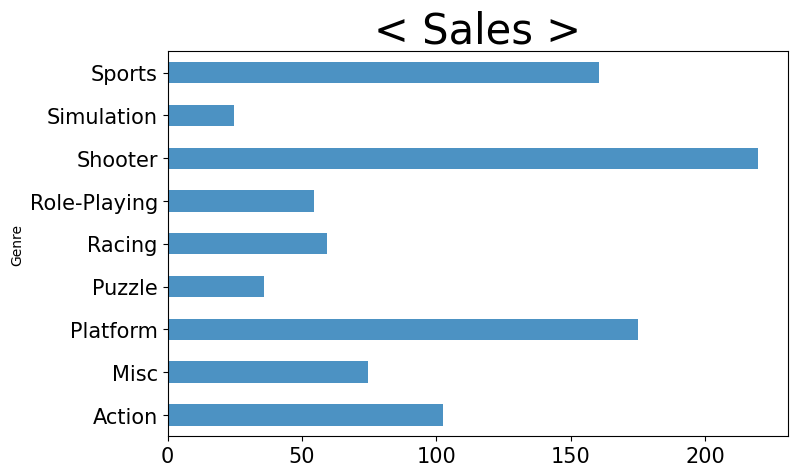

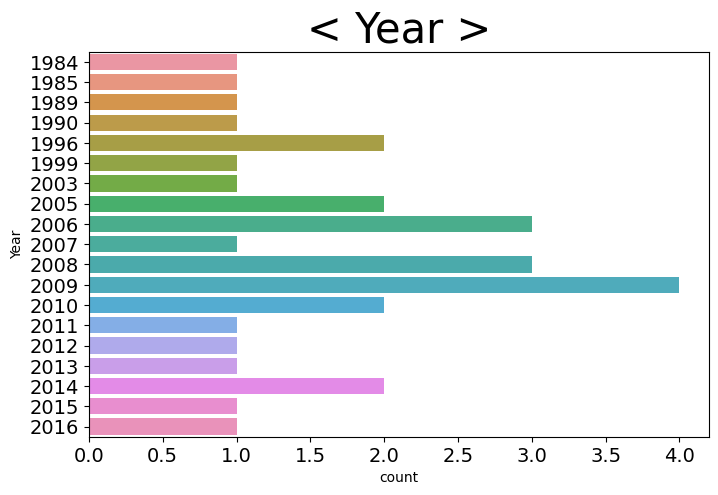

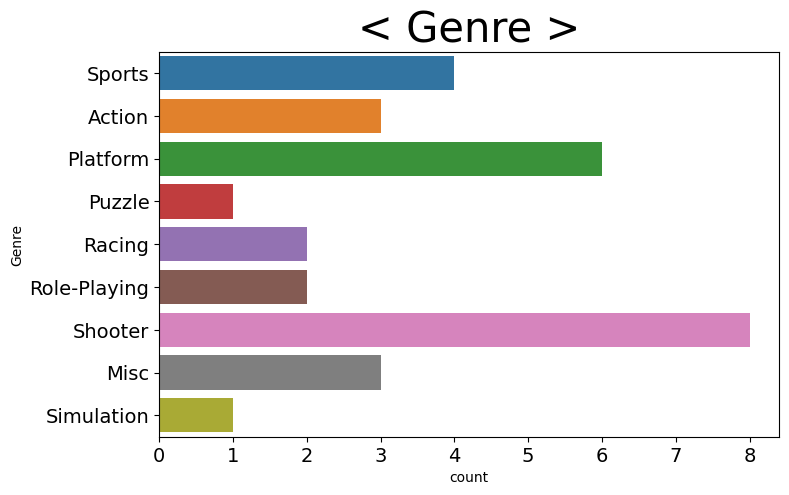

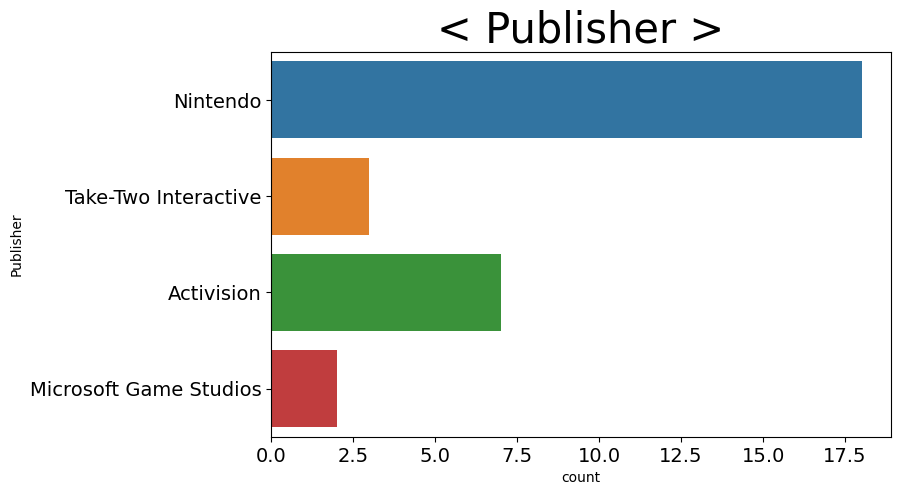

,Name,Total_rank,NA_rank,EU_rank,JP_rank,Other_rank,Year,Genre,Publisher,Total_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10784,Wii Sports,1,1,1,30,2,2006,Sports,Nintendo,82.74,41.49,29.02,3.77,8.46
3633,Grand Theft Auto V,2,5,2,147,3,2014,Action,Take-Two Interactive,55.92,23.46,23.04,1.39,8.03
9149,Super Mario Bros.,3,2,50,3,113,1985,Platform,Nintendo,45.31,32.48,4.88,6.96,0.99
9529,Tetris,4,4,112,6,196,1989,Puzzle,Nintendo,35.84,26.17,2.95,6.03,0.69
5467,Mario Kart Wii,5,8,3,29,11,2008,Racing,Nintendo,35.83,15.85,12.88,3.79,3.31
10786,Wii Sports Resort,6,9,9,38,16,2009,Sports,Nintendo,33.00,15.75,11.01,3.28,2.96
7205,Pokemon Red/Pokemon Blue,7,22,19,1,108,1996,Role-Playing,Nintendo,31.38,11.27,8.89,10.22,1.00
1197,Call of Duty: Black Ops,8,6,14,475,9,2010,Shooter,Activision,31.04,17.59,9.50,0.59,3.36
1203,Call of Duty: Modern Warfare 3,9,10,5,450,10,2011,Shooter,Activision,30.84,15.58,11.29,0.62,3.35
6596,New Super Mario Bros.,10,21,16,4,20,2006,Platform,Nintendo,30.01,11.38,9.23,6.50,2.90


In [382]:
data_high30
data_high30_g = data_high30.groupby('Genre')['Total_Sales'].sum()
data_high30_g.head()

data_high30_g.plot(kind='barh', fontsize=15, alpha=0.8, figsize = (8,5))
plt.title("< Sales >",fontsize = 30)
plt.show()

plt.figure(figsize = (8,5))
plt.title("< Year >",fontsize = 30)
plt.xticks(fontsize = 14 )
plt.yticks(fontsize = 14 )
sns.countplot(data=data_high30, y='Year')

plt.figure(figsize = (8,5))
plt.title("< Genre >",fontsize = 30)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14 )
sns.countplot(data=data_high30, y='Genre')

plt.figure(figsize = (8,5))
plt.title("< Publisher >",fontsize = 30)
plt.xticks(fontsize = 14 )
plt.yticks(fontsize = 14 )
sns.countplot(data=data_high30, y='Publisher')
plt.show()


data_high30

In [383]:
data2011_name_r = data_name_2011
data2011_name_r[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']] = data2011_name_r[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].rank(method='min', ascending = False)
data2011_name_r[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']] = data2011_name_r[['NA_rank', 'EU_rank', 'JP_rank', 'Other_rank', 'Total_rank']].astype('int')
data2011_name_r = data2011_name_r.sort_values('Total_rank')
data2011_name_r = data2011_name_r[['Name','Total_rank','NA_rank', 'EU_rank', 'JP_rank', 'Other_rank','Year', 'Genre', 'Publisher',  'Total_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

data2011_high10 = data2011_name_r[data2011_name_r["Total_rank"] <= 10]
data2011_high30 = data2011_name_r[data2011_name_r["Total_rank"] <= 30]
data2011_high10

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Name,Total_rank,NA_rank,EU_rank,JP_rank,Other_rank,Year,Genre,Publisher,Total_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3633,Grand Theft Auto V,1,1,1,24,1,2014,Action,Take-Two Interactive,55.92,23.46,23.04,1.39,8.03
1203,Call of Duty: Modern Warfare 3,2,2,3,65,4,2011,Shooter,Activision,30.84,15.58,11.29,0.62,3.35
1199,Call of Duty: Black Ops II,3,4,6,52,2,2012,Shooter,Activision,29.73,14.08,11.05,0.72,3.88
1201,Call of Duty: Ghosts,4,3,9,89,10,2013,Shooter,Activision,27.37,14.92,9.05,0.48,2.92
1198,Call of Duty: Black Ops 3,5,5,8,115,3,2015,Shooter,Activision,25.30,11.89,9.56,0.43,3.42
5819,Minecraft,6,6,10,30,9,2016,Misc,Microsoft Game Studios,23.75,10.82,8.85,1.15,2.93
1196,Call of Duty: Advanced Warfare,7,7,12,162,8,2014,Shooter,Activision,21.89,10.44,8.18,0.34,2.93
9621,The Elder Scrolls V: Skyrim,8,8,13,155,11,2011,Role-Playing,Bethesda Softworks,19.28,8.73,7.66,0.35,2.54
2863,FIFA 15,9,55,2,427,5,2014,Sports,Electronic Arts,19.02,3.20,12.40,0.13,3.29
704,Battlefield 3,10,9,14,127,13,2011,Shooter,Electronic Arts,17.37,8.20,6.49,0.41,2.27


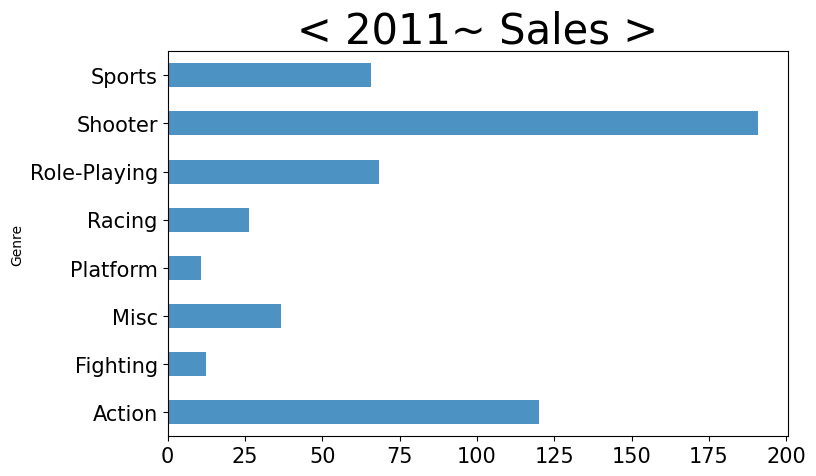

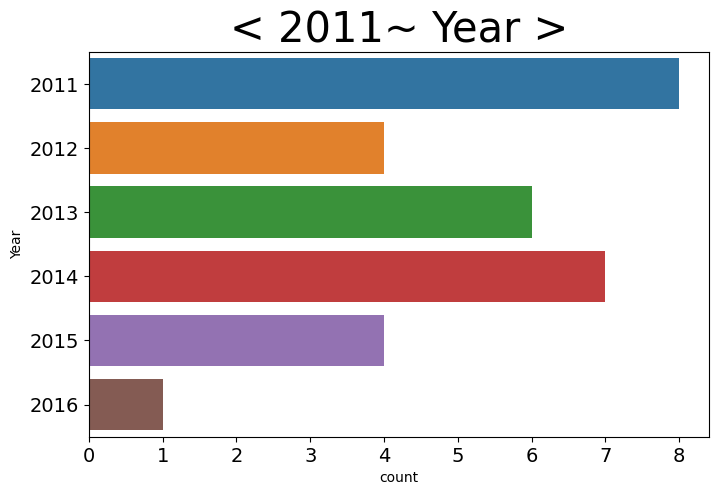

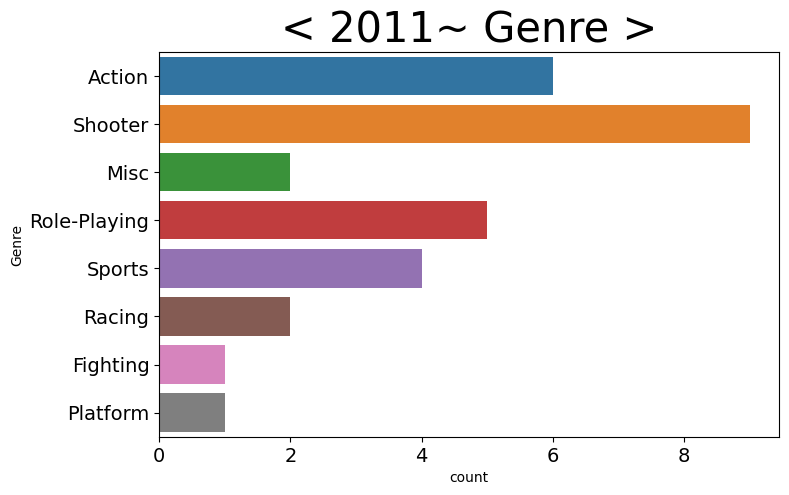

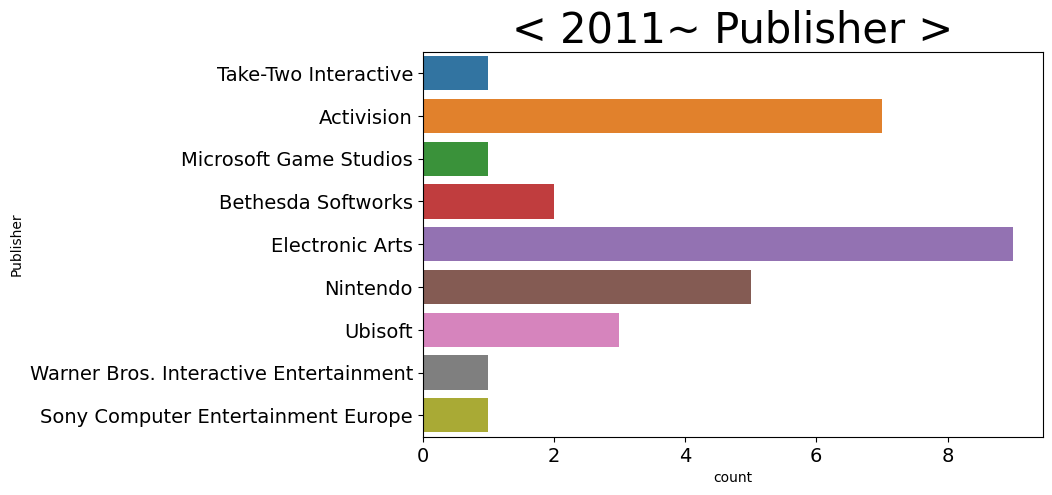

,Name,Total_rank,NA_rank,EU_rank,JP_rank,Other_rank,Year,Genre,Publisher,Total_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3633,Grand Theft Auto V,1,1,1,24,1,2014,Action,Take-Two Interactive,55.92,23.46,23.04,1.39,8.03
1203,Call of Duty: Modern Warfare 3,2,2,3,65,4,2011,Shooter,Activision,30.84,15.58,11.29,0.62,3.35
1199,Call of Duty: Black Ops II,3,4,6,52,2,2012,Shooter,Activision,29.73,14.08,11.05,0.72,3.88
1201,Call of Duty: Ghosts,4,3,9,89,10,2013,Shooter,Activision,27.37,14.92,9.05,0.48,2.92
1198,Call of Duty: Black Ops 3,5,5,8,115,3,2015,Shooter,Activision,25.30,11.89,9.56,0.43,3.42
5819,Minecraft,6,6,10,30,9,2016,Misc,Microsoft Game Studios,23.75,10.82,8.85,1.15,2.93
1196,Call of Duty: Advanced Warfare,7,7,12,162,8,2014,Shooter,Activision,21.89,10.44,8.18,0.34,2.93
9621,The Elder Scrolls V: Skyrim,8,8,13,155,11,2011,Role-Playing,Bethesda Softworks,19.28,8.73,7.66,0.35,2.54
2863,FIFA 15,9,55,2,427,5,2014,Sports,Electronic Arts,19.02,3.20,12.40,0.13,3.29
704,Battlefield 3,10,9,14,127,13,2011,Shooter,Electronic Arts,17.37,8.20,6.49,0.41,2.27


In [384]:
data2011_high30
data2011_high30_g = data2011_high30.groupby('Genre')[ 'Total_Sales'].sum()

data2011_high30_g.plot(kind='barh', fontsize=15, alpha=0.8, figsize = (8,5))
plt.title("< 2011~ Sales >",fontsize = 30)
plt.show()

plt.figure(figsize = (8,5))
plt.title("< 2011~ Year >",fontsize = 30)
plt.xticks(fontsize = 14 )
plt.yticks(fontsize = 14 )
sns.countplot(data=data2011_high30, y='Year')

plt.figure(figsize = (8,5))
plt.title("< 2011~ Genre >",fontsize = 30)
plt.xticks(fontsize = 14 )
plt.yticks(fontsize = 14 )
sns.countplot(data=data2011_high30, y='Genre')

plt.figure(figsize = (8,5))
plt.title("< 2011~ Publisher >",fontsize = 30)
plt.xticks(fontsize = 14 )
plt.yticks(fontsize = 14 )
sns.countplot(data=data2011_high30, y='Publisher')
plt.show()

data2011_high30

In [385]:
data_cluster = data_name
data_cluster['rGenre'] = data_cluster['Genre']
data_cluster
data_cluster.loc[data_cluster['rGenre'] == "Action", 'rGenre'] = 1
data_cluster.loc[data_cluster['rGenre'] == "Shooter", 'rGenre'] = 3
data_cluster.loc[data_cluster['rGenre'] == "Role-Playing", 'rGenre'] = 4
data_cluster.loc[data_cluster['rGenre'] == "Misc", 'rGenre'] = 6
data_cluster.loc[data_cluster['rGenre'] == "Racing", 'rGenre'] = 7
data_cluster.loc[data_cluster['rGenre'] == "Platform", 'rGenre'] =5
data_cluster.loc[data_cluster['rGenre'] == "Sports", 'rGenre'] = 2
data_cluster.loc[data_cluster['rGenre'] == "Fighting", 'rGenre'] = 8
data_cluster.loc[data_cluster['rGenre'] == "Simulation", 'rGenre'] = 9
data_cluster.loc[data_cluster['rGenre'] == "Adventure", 'rGenre'] = 11
data_cluster.loc[data_cluster['rGenre'] == "Strategy", 'rGenre'] = 12
data_cluster.loc[data_cluster['rGenre'] == "Puzzle", 'rGenre'] = 10
data_cluster = data_cluster.drop(columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Genre', 'Publisher'])
data_cluster['rGenre'] = data_cluster['rGenre'].astype('int')


In [386]:
data_cluster.head()
Sales_log = np.log(data_cluster['Total_Sales'])
Year_log = np.log(data_cluster['Year'])
Genre_log = np.log(data_cluster['rGenre'])
log_cluster = pd.concat([Sales_log, Year_log, Genre_log], axis =1)
log_cluster.sample(10)

,Total_Sales,Year,rGenre
831,-2.995732,7.603898,1.386294
7723,-4.605170,7.608871,0.000000
5841,-0.342490,7.605890,1.791759
8122,-0.798508,7.605392,0.000000
6532,-2.813411,7.607878,0.000000
6416,-2.659260,7.599902,2.397895
4560,-4.605170,7.605392,1.098612
1056,-3.218876,7.603399,2.302585
3347,-3.506558,7.601902,1.791759
502,-2.525729,7.602401,0.000000


In [387]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use("default")

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(log_cluster)

In [388]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(cluster_scaled)
  sse[k] = kmeans.inertia_

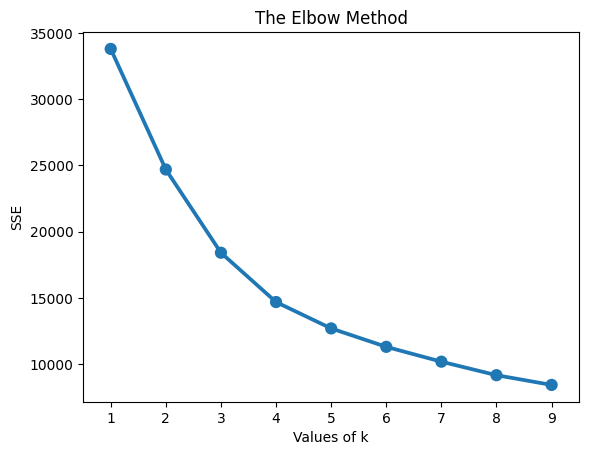

In [389]:
# 결과 시각화

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [390]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(cluster_scaled)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

cluster_k3 = data_cluster.assign(Cluster = cluster_labels)

In [391]:
cluster_k3.head()

,Name,Total_Sales,Year,rGenre,Cluster
0,'98 Koshien,0.40,1998,2,2
1,.hack//G.U. Vol.1//Rebirth,0.17,2006,4,1
2,.hack//G.U. Vol.2//Reminisce,0.23,2006,4,1
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.16,2006,4,1
4,.hack//G.U. Vol.3//Redemption,0.17,2007,4,1


In [392]:
cluster_k3.groupby(['Cluster']).agg({
    'Total_Sales': 'mean',
    'Year': 'mean',
    'rGenre': ['mean']
}).round(2)

,Total_Sales,Year,rGenre
,mean,mean,mean
Cluster,,,
0,1.18,2008.13,1.70
1,0.18,2008.52,7.84
2,1.27,1999.20,5.87


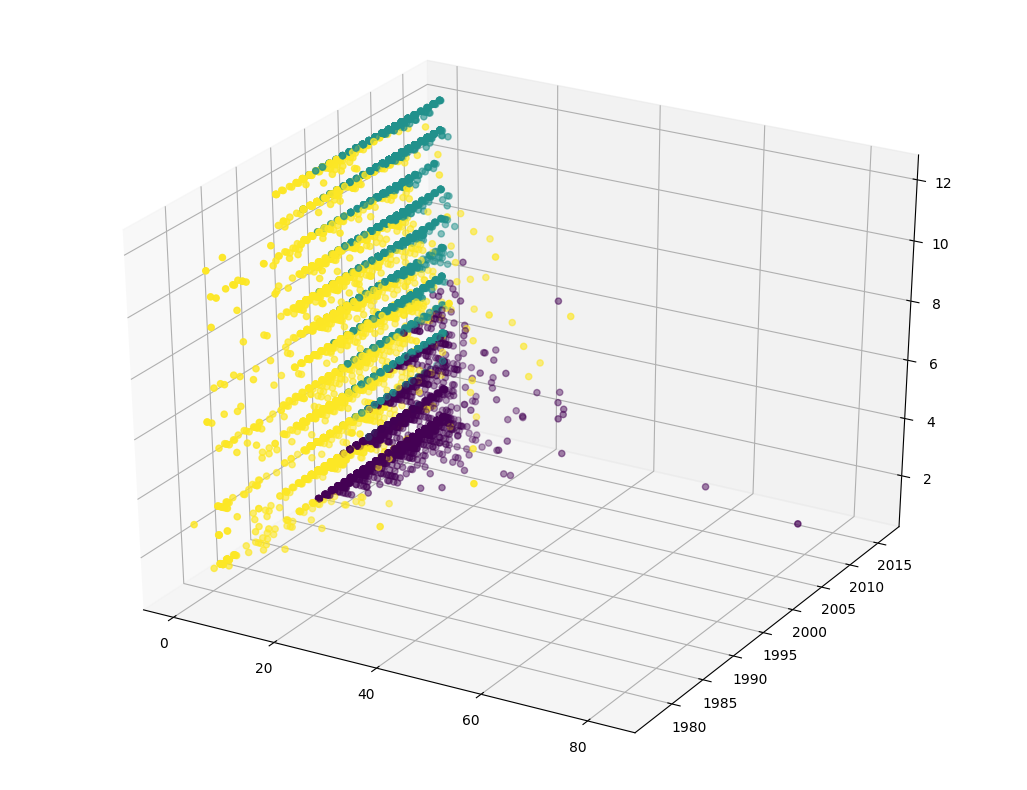

In [393]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = cluster_k3.Total_Sales, ys = cluster_k3.Year, zs = cluster_k3.rGenre, c=cluster_k3.Cluster)

plt.show()

In [394]:
data_name_2011 = data_name_2011.drop(columns = ['NA_rank',	'EU_rank',	'JP_rank',	'Other_rank',	'Total_rank'])
data_cluster = data_name_2011
data_cluster['rGenre'] = data_cluster['Genre']
data_cluster
data_cluster.loc[data_cluster['rGenre'] == "Action", 'rGenre'] = 1
data_cluster.loc[data_cluster['rGenre'] == "Shooter", 'rGenre'] = 3
data_cluster.loc[data_cluster['rGenre'] == "Role-Playing", 'rGenre'] = 4
data_cluster.loc[data_cluster['rGenre'] == "Misc", 'rGenre'] = 6
data_cluster.loc[data_cluster['rGenre'] == "Racing", 'rGenre'] = 7
data_cluster.loc[data_cluster['rGenre'] == "Platform", 'rGenre'] =5
data_cluster.loc[data_cluster['rGenre'] == "Sports", 'rGenre'] = 2
data_cluster.loc[data_cluster['rGenre'] == "Fighting", 'rGenre'] = 8
data_cluster.loc[data_cluster['rGenre'] == "Simulation", 'rGenre'] = 9
data_cluster.loc[data_cluster['rGenre'] == "Adventure", 'rGenre'] = 11
data_cluster.loc[data_cluster['rGenre'] == "Strategy", 'rGenre'] = 12
data_cluster.loc[data_cluster['rGenre'] == "Puzzle", 'rGenre'] = 10
data_cluster = data_cluster.drop(columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Genre', 'Publisher'])
data_cluster['rGenre'] = data_cluster['rGenre'].astype('int')


In [395]:
data_cluster.head()
Sales_log = np.log(data_cluster['Total_Sales'])
Year_log = np.log(data_cluster['Year'])
Genre_log = np.log(data_cluster['rGenre'])
log_cluster = pd.concat([Sales_log, Year_log, Genre_log], axis =1)
log_cluster.sample(10)

,Total_Sales,Year,rGenre
6916,-3.912023,7.606885,0.000000
9347,-2.207275,7.607878,1.791759
7759,-4.605170,7.607878,2.397895
5213,-1.309333,7.606885,1.791759
9323,-3.912023,7.608374,0.000000
6720,-1.514128,7.606387,1.791759
9954,-0.891598,7.607381,0.000000
9093,-2.407946,7.608871,0.000000
748,-3.912023,7.607381,2.397895
1595,-1.386294,7.607878,2.397895


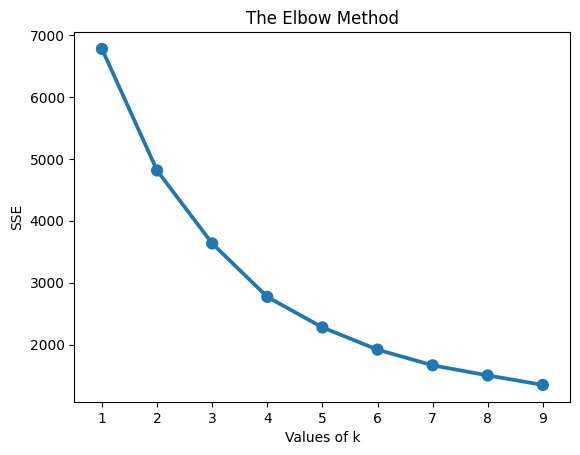

In [396]:
plt.style.use("default")

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(log_cluster)

sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(cluster_scaled)
  sse[k] = kmeans.inertia_

  # 결과 시각화

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [397]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(cluster_scaled)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

cluster_k3 = data_cluster.assign(Cluster = cluster_labels)

In [398]:
cluster_k3.head()

,Name,Total_Sales,Year,rGenre,Cluster
10,.hack: Sekai no Mukou ni + Versus,0.03,2012,1,0
16,1/2 Summer +,0.01,2013,11,1
20,100 Classic Games,0.03,2011,6,1
22,1001 Touch Games,0.33,2011,1,0
29,12-Sai. Honto no Kimochi,0.07,2014,11,2


In [401]:
cluster_k3.groupby(['Cluster']).agg({
    'Total_Sales': 'mean',
    'Year': 'mean',
    'rGenre': ['mean']
}).round(2)

,Total_Sales,Year,rGenre
,mean,mean,mean
Cluster,,,
0,2.09,2012.42,2.00
1,0.26,2011.55,7.61
2,0.25,2014.98,5.26


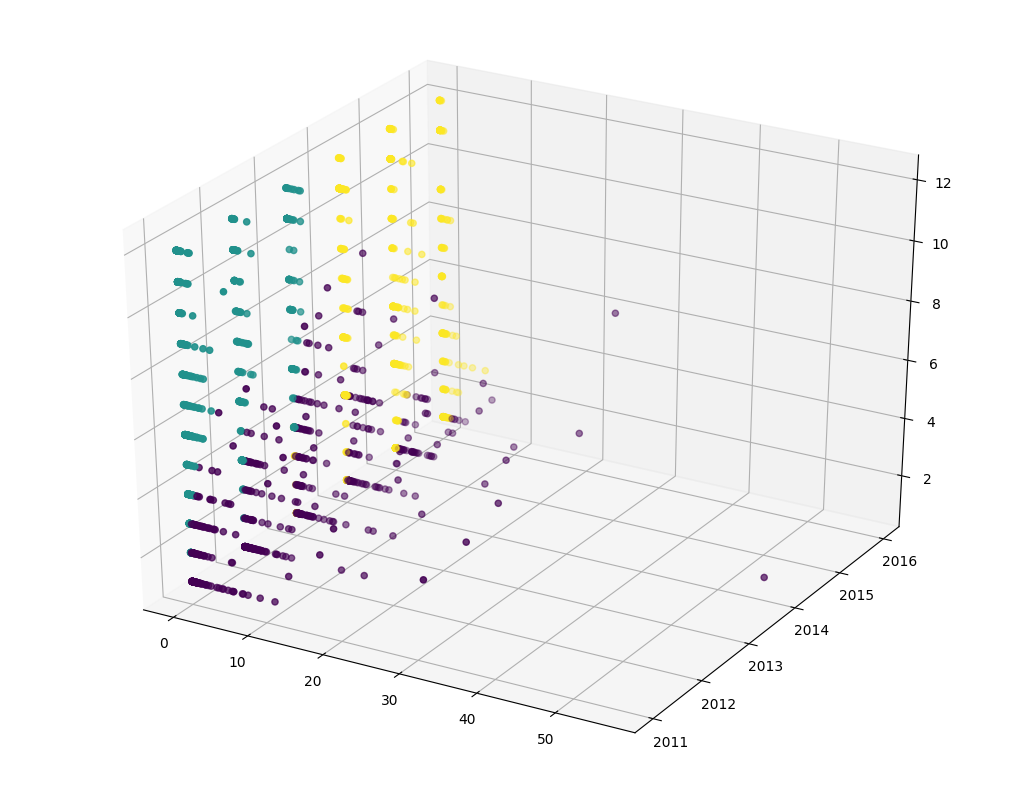

In [402]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = cluster_k3.Total_Sales, ys = cluster_k3.Year, zs = cluster_k3.rGenre, c=cluster_k3.Cluster)

plt.show()